# Stylized Facts of Financial Asset Returns

The volatility of financial time-series varies over time, and the non-observable nature of the volatility makes the measurement and forecasting a challenge. **Varying Volatility Models** are motivated by three empirical observations:

### 1. Volatility Clustering:

Calm and steady periods are usually followed by other periods of calmness and turbulent periods are followed by other turbulent periods within the financial markets.

### 2. Non-Normality of Asset Returns:

Asset returns tend to have fat tails relative to the normal distribution.

### 3. Leverage Effect:

Volatility tends to react differently to positive or negative price movements:

- A **drop in prices** increases volatility to a larger extent than an increase of a similar size

## Stylized Facts in Practice

### 1. Persistence in Squared Returns

There is persistence in squared returns but not in the level of returns

[1] "AAPL"

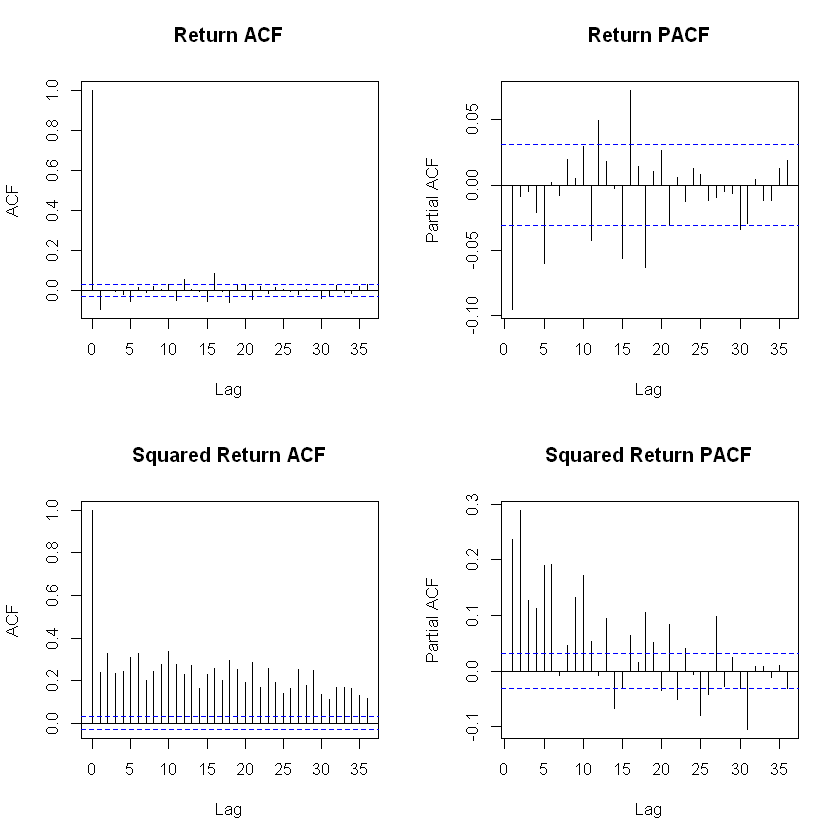

In [2]:
library(quantmod)
library(moments)
getSymbols("SNP", from = "2004-01-01", to=Sys.Date())

## Get return
ret <- dailyReturn(Cl(SNP), type = "log")

## Construct Autocorrelation Plots
par(mfrow = c(2,2))
acf(ret, main = "Return ACF")
pacf(ret, main = "Return PACF")
acf(ret^2, main = "Squared Return ACF")
pacf(ret^2, main = "Squared Return PACF")

### 2. Normality Violation

We compare the empirical distribution of daily log returns of S&P 500 with the normal distribution of the same mean and standard deviation

<code> density(ret) </code> computes the non-parametric empirical distribution function.

<code> curve() </code> with <code> add = TRUE </code> wil plot an additional line to an existing diagram.


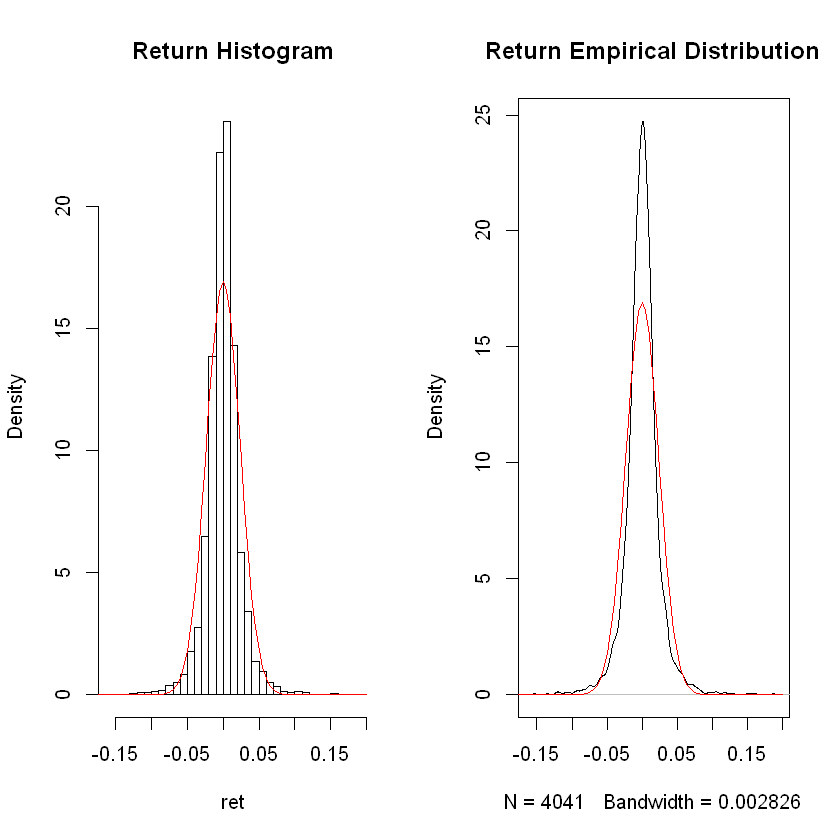

In [17]:
# define mean and sd
m = mean(ret)
s = sd(ret)

# Plot the distribution
par(mfrow=c(1,2))
hist(ret, nclass=40, freq=FALSE, main ="Return Histogram")
curve(dnorm(x, mean = m, sd=s), from = -0.3, to = 0.2, add=TRUE, col = "red")

# Plot the density
plot(density(ret), main = "Return Empirical Distribution")
curve(dnorm(x, mean = m, sd = s), from = -0.3, to = 0.2, add=TRUE, col = "red")

As we can see there is excess kurtosis and fat tails which we can confirm below:

In [22]:
kurtosis(ret)

daily.returns 
     9.409081

**Zooming in** to the upper or lower tail of the distribution also yields interesting results.

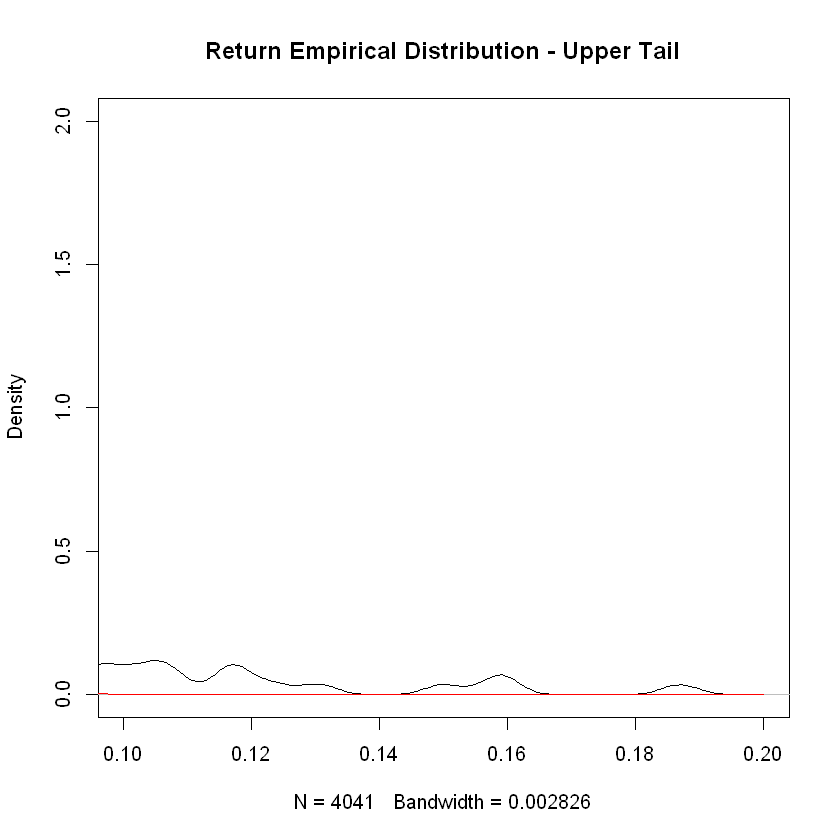

In [31]:
## Tail zoom

plot(density(ret), main = "Return Empirical Distribution - Upper Tail",
     xlim = c(0.1,0.2), 
     ylim = c(0, 2))

curve(dnorm(x, mean = m, sd = s), from = -0.3, to = 0.2, add= TRUE, col = "red")

### QQ-Plots and Density at a Log-Scale

Tools for comparing densities.

**QQ-Plots:** depict the empirical quantiles against that of a theoretical (normal) distribution

Deviations from the *normal distriution straight line* may indicate presence of fait tails

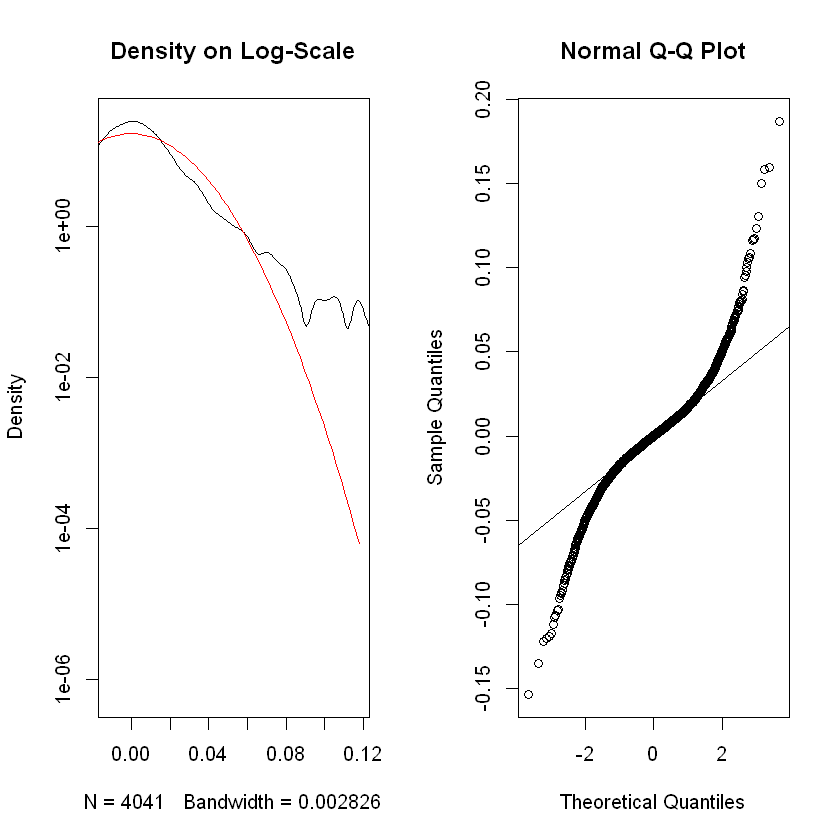

In [35]:
par(mfrow = c(1,2))

# Density plots on a log-scale
plot(density(ret), xlim=c(-0.5*s, 5*s), log = "y", main = "Density on Log-Scale")
curve(dnorm(x, mean = m, sd = s), from = -5*s, to = 5*s, log = "y", add= TRUE, col = "red")

# QQ-Plot
qqnorm(ret)
qqline(ret)